# Predicting a Song's Success using Machine Learning

![concert](images/concert.jpg)

## Author: [Patricio Contreras](https://www.linkedin.com/in/pcontreras97/)

## Overview

The main goal of this project is to develop a machine learning model that predicts whether a song will be considered a "hit" or "flop".  Before creating the model, exploratory data analysis will be performed in order to learn about our data and visualise interesting relationships between the variables.  Once this is carried out and the data is cleaned, a series of different machine learning algorithms will be trained and evaluated in their predictive performance.  After comparing and reviewing the results obtained, the algorithm with the best performance overall will be chosen.

## 1. Business Understanding

Composing a song is by no means an easy feat.  Nowadays music of all different genres is available to a larger audience and tastes in music are more diversified than ever.  This means that artists must take into account several factors that could potentially determine if the song is well-received by the public or not.  Should my song be more energetic?  Should my song be long or short?  Should I focus on the song being loud?  Or do people prefer acoustic songs?

In an effort to assist music artists and minimise the risk of composing a "flop", the goal of this project is to provide predictions on a potential song's success by taking into account factors like danceability, acousticness, loudness, etc. 

## 2. Data Understanding

Before any sophisticated and complex modeling is performed, it is essential to gain a solid understanding of the data.  An effective and powerful way of doing this is by performing exploratory data analysis.

In [1]:
# importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This project uses the *Spotify Hit Predictor Dataset* found in the [data](data) folder.  It contains data on songs from 1960 all the way to 2019.  For more information on how the data was obtained, please click [here](https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset?select=LICENSE).

In [2]:
# reading in the csvs from the data folder
data_60s = pd.read_csv("data/dataset-of-60s.csv")
data_70s = pd.read_csv("data/dataset-of-70s.csv")
data_80s = pd.read_csv("data/dataset-of-80s.csv")
data_90s = pd.read_csv("data/dataset-of-90s.csv")
data_00s = pd.read_csv("data/dataset-of-00s.csv")
data_10s = pd.read_csv("data/dataset-of-10s.csv")

i = 1960
datasets = [data_60s, data_70s, data_80s, data_90s, data_00s, data_10s]
# printing dimensions for each data frame
for df in datasets:
    print("The dataset from the {}s has:".format(i))
    print(df.shape[0], "rows")
    print(df.shape[1], "columns")
    print("--------------------------------------")
    i += 10
print("\n")
print("First five rows of the 1960s dataset:")
data_60s.head()

The dataset from the 1960s has:
8642 rows
19 columns
--------------------------------------
The dataset from the 1970s has:
7766 rows
19 columns
--------------------------------------
The dataset from the 1980s has:
6908 rows
19 columns
--------------------------------------
The dataset from the 1990s has:
5520 rows
19 columns
--------------------------------------
The dataset from the 2000s has:
5872 rows
19 columns
--------------------------------------
The dataset from the 2010s has:
6398 rows
19 columns
--------------------------------------


First five rows of the 1960s dataset:


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


The music data used in this project was organised into csv files per decade.  As seen above, all of the datasets have the same number of columns and around the same number of rows.  The first few rows of the 1960s dataset gives us a preview of what the data looks like.  Fortunately, the [data](data) folder also has a data dictionary which explains what each column represents:

- **track**: The name of the track.

- **artist**: The name of the artist.

- **uri**: The resource identifier for the track.

- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
		   
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
	
- **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
	
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
	
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
	
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
	
- **duration_ms**: 	The duration of the track in milliseconds.
	
- **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
	
- **chorus_hit**: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track (in milliseconds). This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
	
- **sections**: The number of sections the particular track has. This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
	
- **target**: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' implies that the track is a 'flop'.
		
The author's condition of a track being 'flop' is as follows:

- The track must not appear in the 'hit' list of that decade.
- The track's artist must not appear in the 'hit' list of that decade.
- The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
- The track's genre must not have a song in the 'hit' list.
- The genre list for the particular decades are as follows:
- The track must have 'US' as one of its markets.

In order to not deal with multiple datasets, we'll combine all of them into one `df`:

In [3]:
# creating one data frame to work with (same as rbind() in R)
df = pd.concat(datasets, axis = 0)
# first five rows (equal to data_60s)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [4]:
print("This combined dataset has", df.shape[0], "rows and", df.shape[1], "columns!")

This combined dataset has 41106 rows and 19 columns!


Now that we know the meaning of each column in the dataset, let's check their data types.  This can serve as a way to determine if the column will be treated as continuous or categorical:

In [5]:
# data type of each column
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

All of the columns appear to have the correct data type (given the column descriptions shown above).

### Descriptive Statistics of the Data

A good rule of thumb when performing exploratory data analysis is to first view descriptive statistics of the columns to get a sense of how our data is distributed:

In [6]:
# descriptive statistics of numeric columns
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


Even though the output above only shows calculations done for our numeric columns, there are some important takeaways.  First of all, `target` seems to have an even distribution (given a mean *and* median of 0.5).  Furthermore, `liveness` and `loudness` appear to have skewed distributions whereas `danceability` should have a more normal distribution.  Finally, the output above also reminds us that even though most features have the same range (0-1), other features like `loudness` or `tempo` have values in different scales.

### Check for Missing Values

As we start getting acquainted with the data, we musn't forget to check for missing values.  In general, missing values are problematic and should be taken care of in the cleaning step:

In [7]:
# number of missing values per column
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

There don't seem to be any missing values in our data frame!  This is good news since we won't have to worry about cleaning them later on.

### Check for Duplicates

As opposed to missing values, duplicates are far more subtle and could easily go unnoticed.  This can lead to untrustworthy results and inaccurate distributions.  Given that a single song could be considered a "hit" in different decades (e.g., 'Twist and Shout' by The Beatles was a hit in the 1960s and the 1980s after *Ferris Bueller's Day Off*), a record will be considered a "duplicate" if **all** its values are repeated elsewhere in the data frame.

In [8]:
# number of duplicates in the data frame
print("The number of duplicates in this data frame are:", sum(df.duplicated()))

The number of duplicates in this data frame are: 420


Unfortunately there *are* duplicates in our dataset.  Despite a track becoming a hit in two different decades, the track's features like `danceability`, `energy`, `loudness`, etc. will still be the same.  Therefore, it doesn't make sense to keep the duplicates since we already have a record of the first time they became hits.  Before exploring the data through visualisations, we'll quickly remove these duplicates:

In [9]:
# removing 420 duplicates:
df = df[~df.duplicated()]
print("We now have", df.shape[0], "rows!")

We now have 40686 rows!


### Data Visualisations

Having checked for missing values and duplicates, it's a good idea to visualise our data and see if there are any interesting relationships between the variables.  This section is concerned with answering the following questions via visualisations:

* How are all the variables distributed?
* Which artists have the most number of "hits" in the dataset?
* Are there any interesting relationships between variables?

Distributions of numeric variables in the data frame:


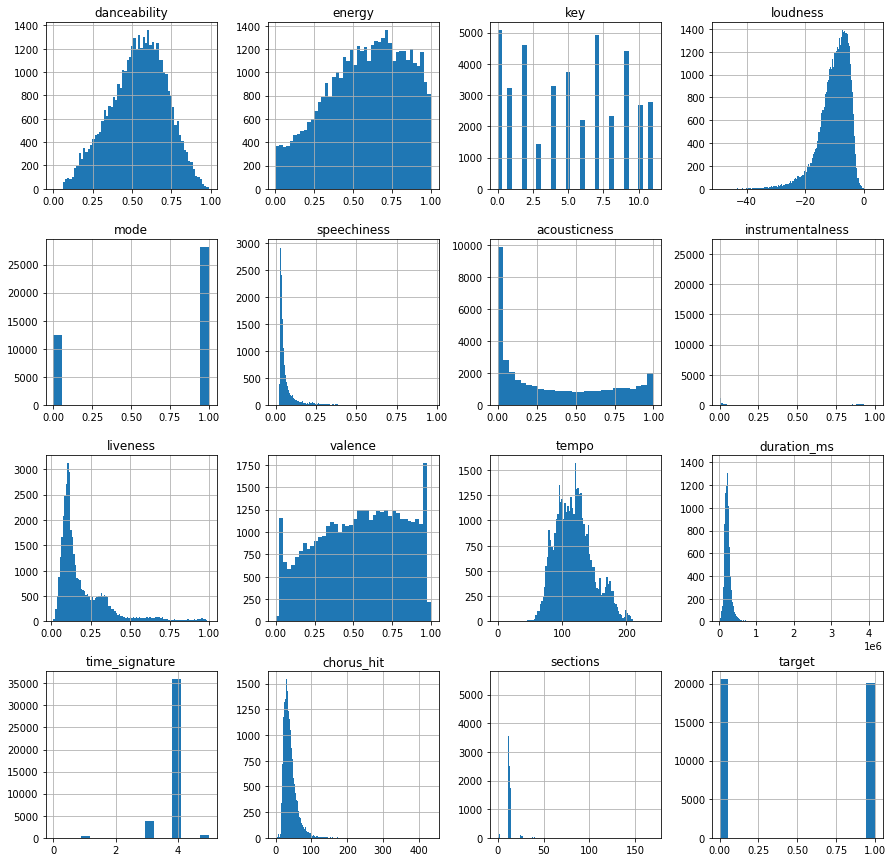

In [10]:
print("Distributions of numeric variables in the data frame:")
df.hist(bins = "auto", figsize = (15,15));

These histograms allow us to see how the data is distributed and provide insight on the nature (continuous vs. categorical) of each variable.  As mentioned before, `loudness` and `liveness` *do* have skewed distributions and most songs have a `danceability` value at around 0.5.  Furthermore, removing the duplicates had an effect on the distribution of our `target` variable as it is no longer evenly distributed.  Finally, most songs are written in major scale and the distribution of `energy` lets us know that most songs have a high `energy` value.

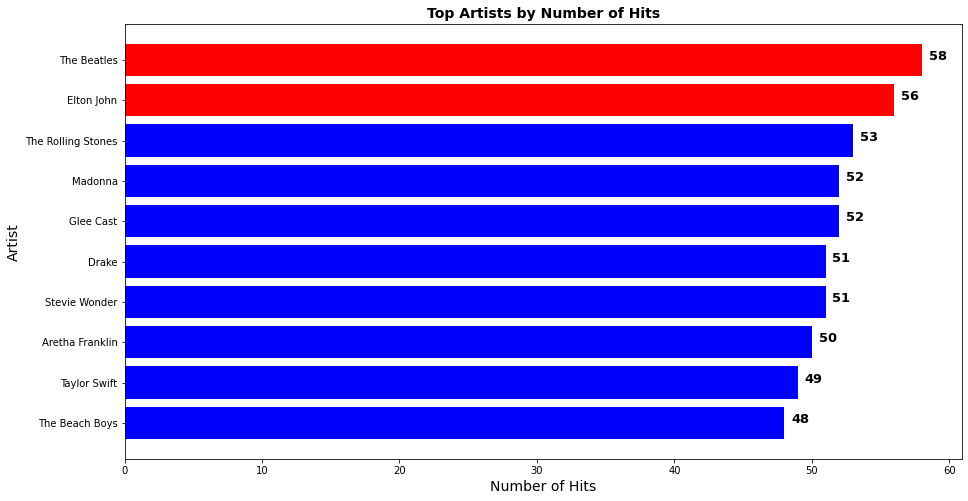

In [11]:
# top 10 artists by number of "hits"
top_artists = df[df.target == 1].groupby("artist")["target"].sum().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (15,8))
ax.barh(y = top_artists.index, width = top_artists, 
        color = ["r", "r", "b", "b", "b", "b", "b", "b", "b", "b"])
plt.title("Top Artists by Number of Hits", fontsize = 14, 
          fontweight = "bold")
plt.xlabel("Number of Hits", fontsize = 14)
plt.ylabel("Artist", fontsize = 14)
ax.tick_params(labelsize = 10)
ax.invert_yaxis()
for i, v in enumerate(top_artists):
    ax.text(v + 0.5, i, str(v), color = "black", 
            fontweight = "bold", fontsize = 13)
#plt.savefig("./images/top_artists.png", dpi = 150, bbox_inches = "tight")

Unsurprisingly, *The Beatles* are the most successful artist in terms of number of "hits", followed closely by Sir Elton John.  

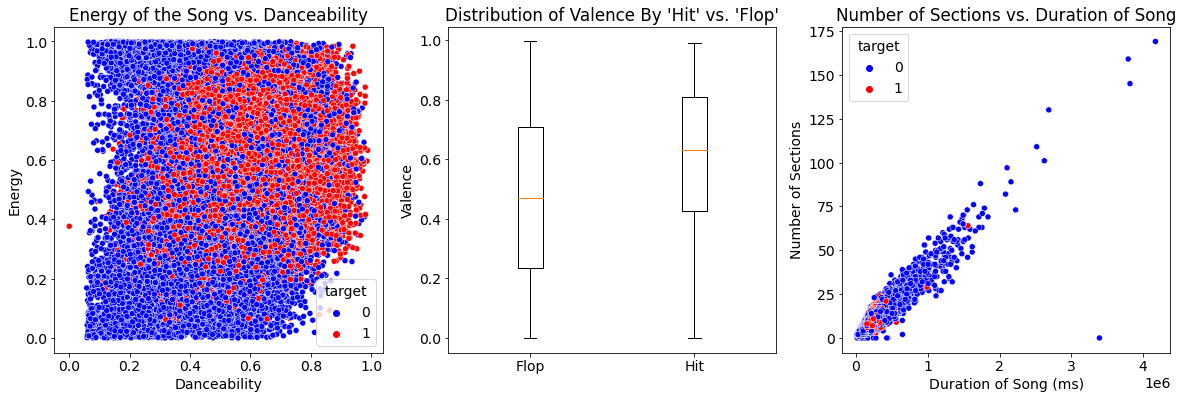

In [12]:
# valence distribution per song type
target_dict = {"Flop": df.loc[df.target == 0, "valence"], 
               "Hit": df.loc[df.target == 1, "valence"]}

plt.rcParams["font.size"] = 14

fig, ax = plt.subplots(1, 3, figsize = (20,6))
# energy vs. danceability scatterplot
sns.scatterplot(x = "danceability", y = "energy", hue = "target", 
                palette = ["b", "r"], data = df, ax = ax[0])
ax[0].set_title("Energy of the Song vs. Danceability")
ax[0].set_xlabel("Danceability")
ax[0].set_ylabel("Energy")

# distribution of valence per hit/flop
ax[1].boxplot(target_dict.values(), labels = target_dict.keys());
ax[1].set_title("Distribution of Valence By 'Hit' vs. 'Flop'")
ax[1].set_ylabel("Valence")

sns.scatterplot(x = "duration_ms", y = "sections", hue = "target",
               palette = ["b", "r"], data = df, ax = ax[2])
ax[2].set_title("Number of Sections vs. Duration of Song")
ax[2].set_xlabel("Duration of Song (ms)")
ax[2].set_ylabel("Number of Sections");

#plt.savefig("./images/EDA.png", dpi = 150, bbox_inches = "tight")

The plots above allow us to visualise the relationship between variables like `danceability`, `energy`, `valence`, `sections`, and `duration_ms` with the target/response variable `target` (hit/flop).

* The first plot on the left suggests "hit" songs tend to have high `danceability` and `energy` values.  The high concentration of red circles (hit songs) in the upper-right corner explains this.

* Is there a relationship between the `valence` of a song and its success?  In other words, do happier songs succeed more than sad songs?  The second plot seems to suggest this is the case by having the "hit" distribution slightly higher up than the flop distribution.

* There must be a relationship between the number of sections a song has and the duration, right?  The third and final plot confirms this by showing a strong, positive relationship between the two variables.  However, there doesn't seem to be a relationship with `target` given that most points are concentrated in the bottom-left corner.

The final data exploration visualisation we'll plot is a seaborn pairplot.  This is a great way to visualise **all** the relationships between the features and the response variable through scatterplots and histograms:

In [15]:
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


/Users/krish/Desktop/Projects/SpotifyML_Bootcamp-main/music-venv/lib/python3.10/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

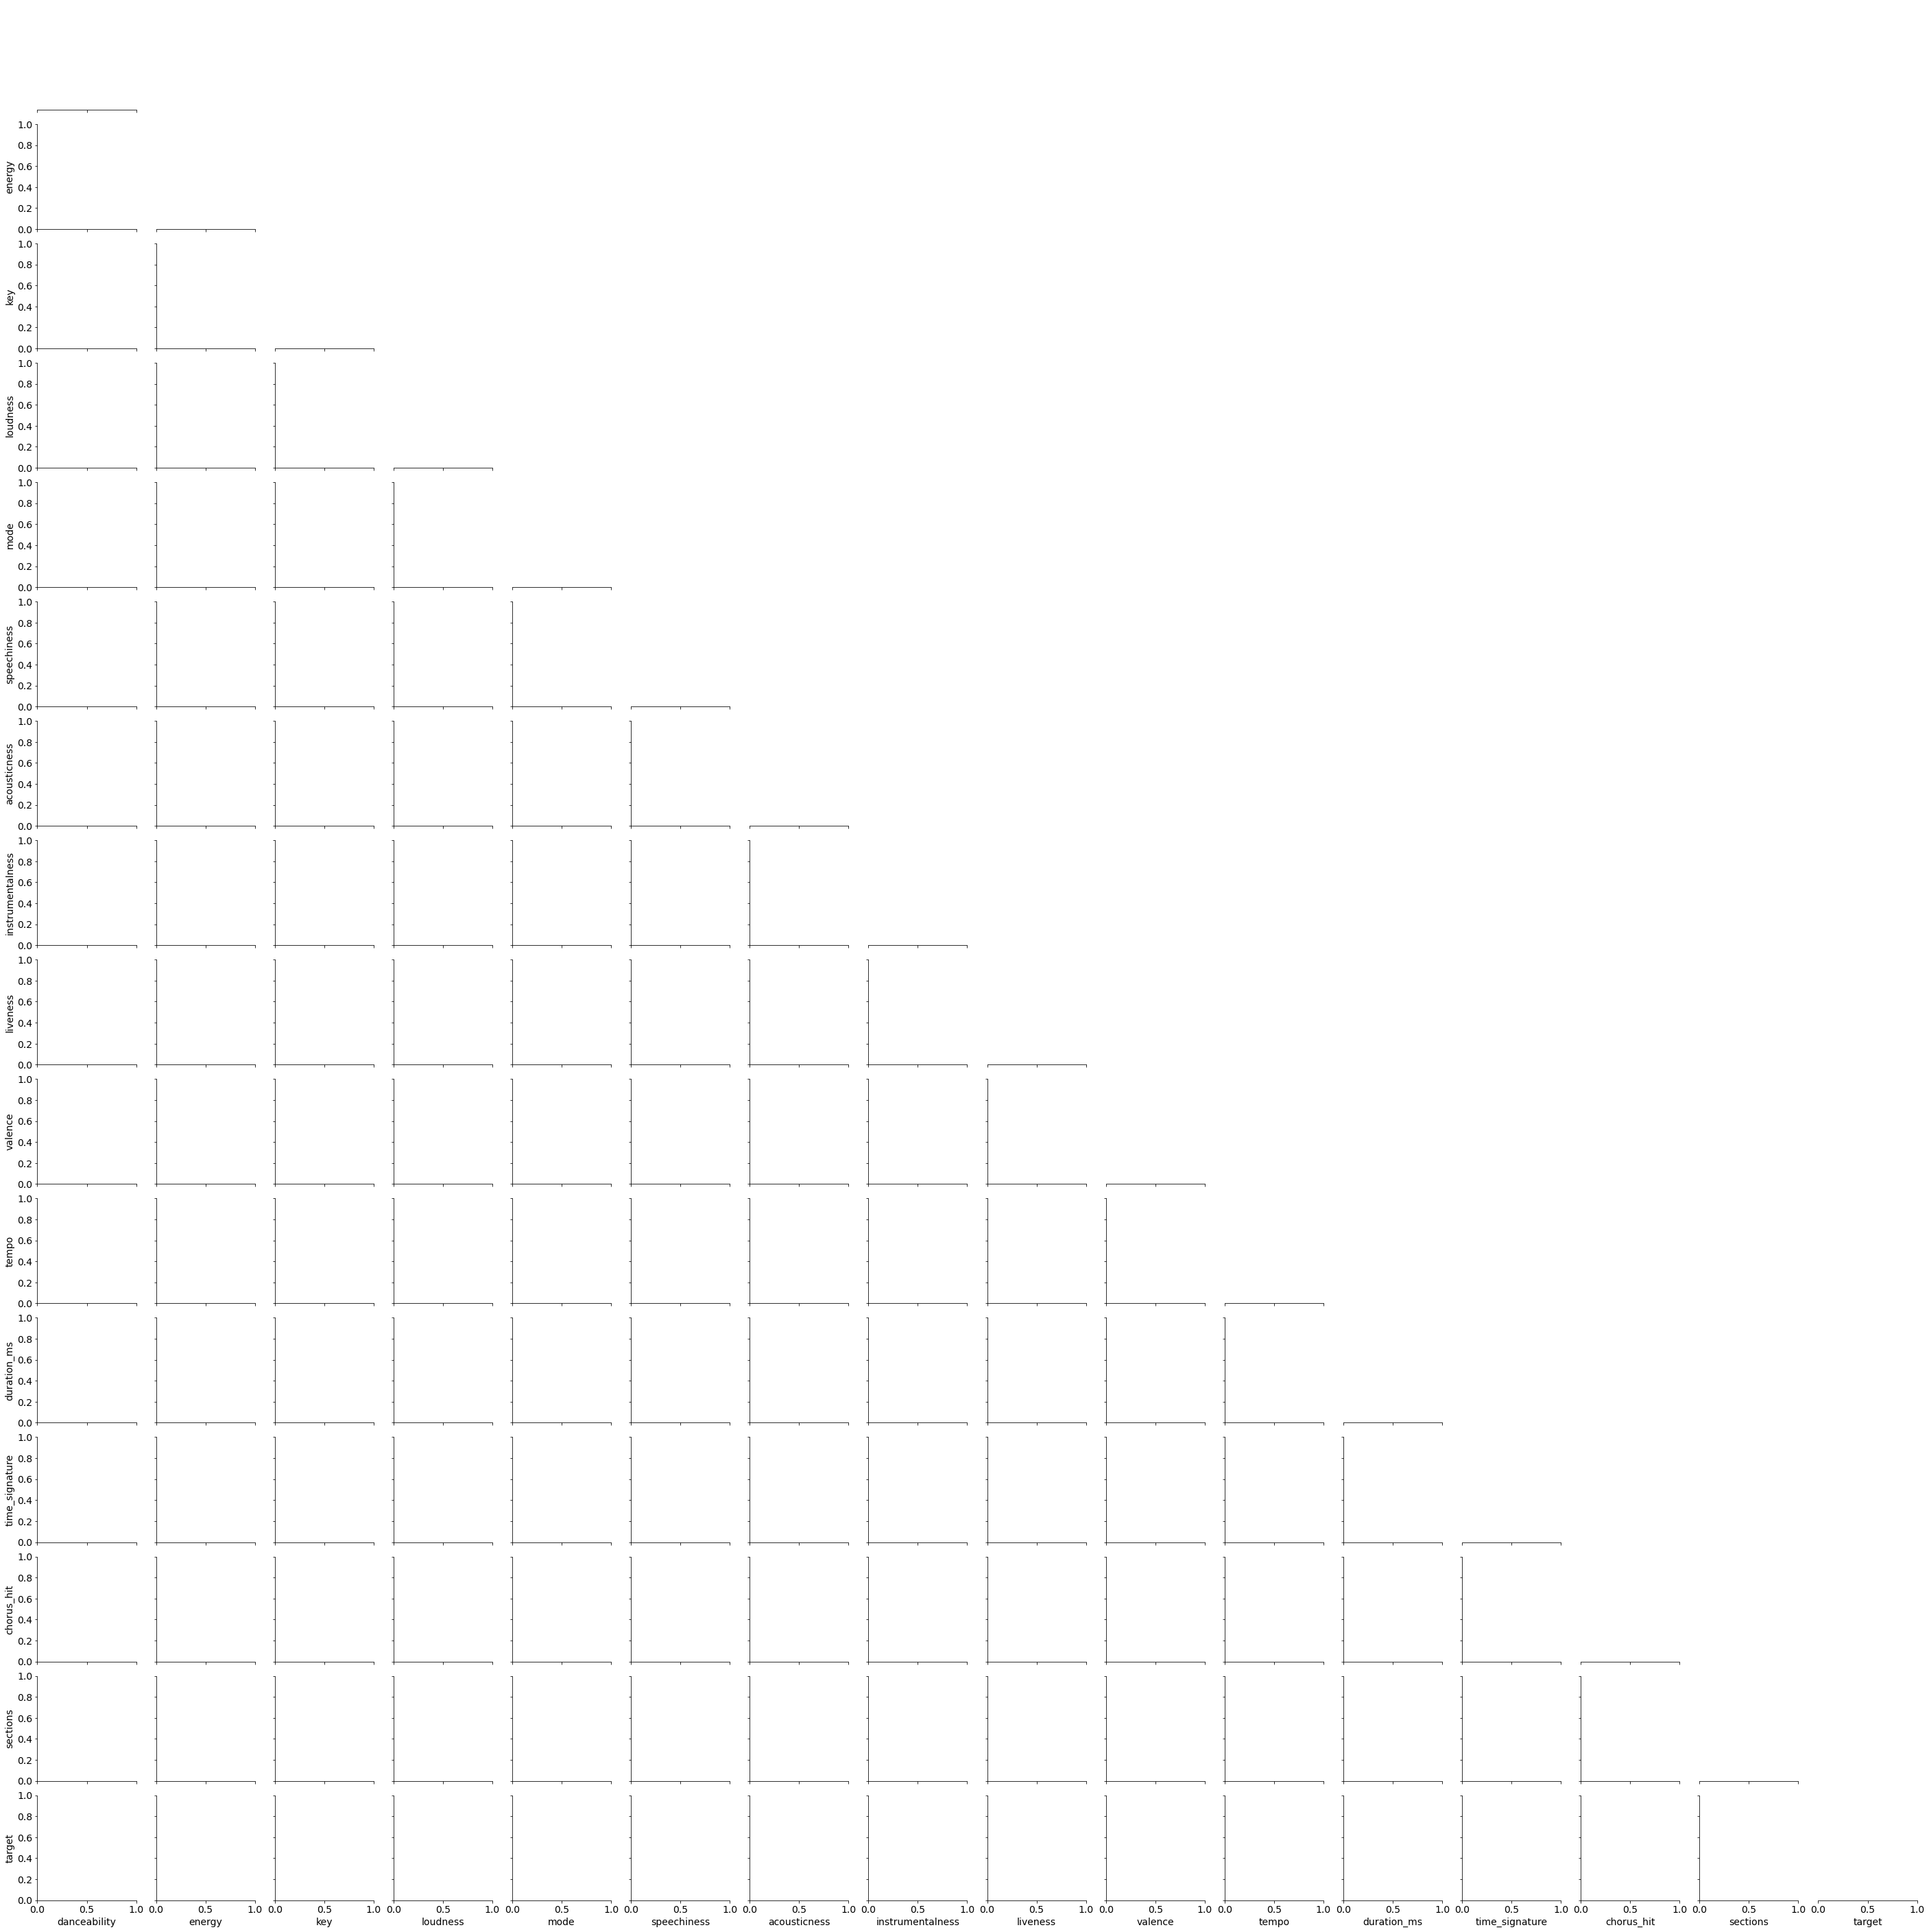

In [14]:
# lower triangle pairplot
sns.pairplot(df, corner = True)

*With the exception of `sections`-`duration_ms` and `loudness`-`energy`*, the pairs plot above doesn't show any real strong relationship between any two variables.  As shown in the previous scatterplot, `duration_ms` and `sections` have a positive relationship.  Furthermore, `energy` and `loudness` have a non-linear, positive relationship.

## Data Preparation

Our data is fairly clean as it is (no missing values, already cleaned duplicates, no class imbalance problems).  Furthermore, the data range for each column is mainly consistent (0-1).  This section will therefore focus on dropping some unnecessary columns, checking for multicollinearity, and renaming columns for interpretability.

### Dropping `track`, `artist`, and `uri`

These variables will be dropped from our data frame since they're all categorical and contain *many* levels.  Furthermore, these variables mostly serve as record identifiers, which means that their values will mostly be unique.  Finally, will the name of a track really influence if it's a hit?  Would its "uri" have any say in the track's success?  I don't think so.

In [ ]:
# removing unnecessary columns
df = df.drop(["track", "artist", "uri"], axis = 1)

### Checking for Multicollinearity

In addition to the pairs plot shown before, a good way of checking for variable independence is to plot a heatmap of the correlations between all the variables available in the dataset and inspect for values >= |0.8|:

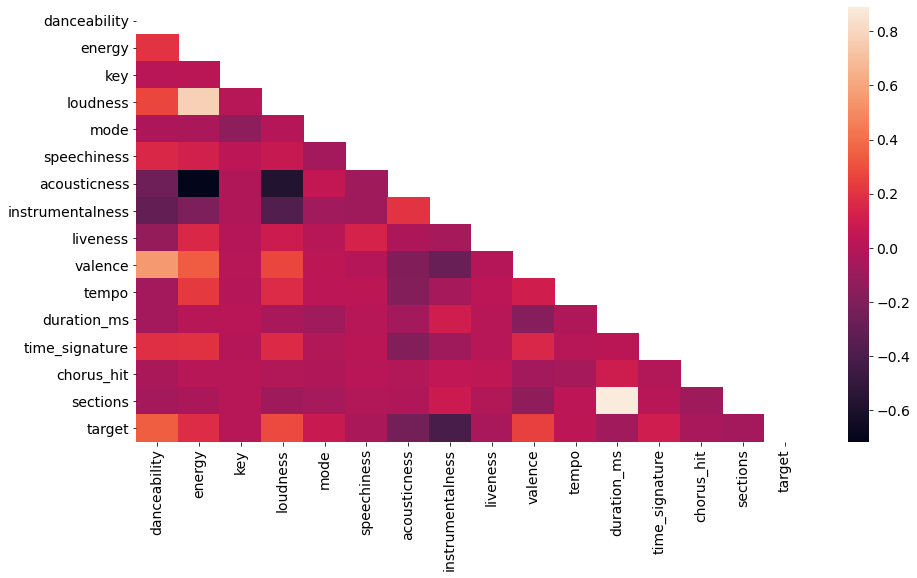

In [ ]:
plt.figure(figsize = (15,8))
# correlation heatmap
sns.heatmap(df.corr(), mask = np.triu(np.ones_like(df.corr())));
#plt.savefig("./images/heatmap.png", dpi = 150, bbox_inches = "tight")

It seems that `sections` - `duration_ms`, `loudness` - `energy`, `acousticness` - `energy`, and `acousticness` - `loudness` have a high absolute correlation.  Let's see the actual correlation values:

In [ ]:
# correlation between two variables
df[["sections", "duration_ms", "loudness", "energy", "acousticness"]].corr()

,sections,duration_ms,loudness,energy,acousticness
sections,1.000000,0.889476,-0.080645,-0.040583,-0.016200
duration_ms,0.889476,1.000000,-0.050404,0.011503,-0.069565
loudness,-0.080645,-0.050404,1.000000,0.772886,-0.566687
energy,-0.040583,0.011503,0.772886,1.000000,-0.715834
acousticness,-0.016200,-0.069565,-0.566687,-0.715834,1.000000


The correlation value between `sections` and `duration_ms` is definitely higher than 0.8.  To avoid multicollinearity problems, we'll remove `sections` and keep `duration_ms`.

In [ ]:
# dropping variable with high correlation
df = df.drop("sections", axis = 1)

### Renaming Columns

This part is not necessary but I like my columns to be as interpretable as possible:

In [ ]:
# again, not necessary.  this just makes it easier for me and looks nicer, in my opinion
df.rename(columns = {"mode": "is_Major", "valence": "Positivity", 
                     "sections": "num_Sections", "target": "is_Hit"}, inplace = True)

------

### Final Data Frame

In [ ]:
df.head()

,danceability,energy,key,loudness,is_Major,speechiness,acousticness,instrumentalness,liveness,Positivity,tempo,duration_ms,time_signature,chorus_hit,is_Hit
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,1
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,0


In [ ]:
# final dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 40686
Number of columns: 15


In [ ]:
# save data frames for use in separate notebook!
df.to_csv("data/df.csv", index = False)

Having explored the data and cleaned it, we're ready to start the modelling step of this project.  To continue with this project, please click [here](ML.ipynb)!